# Worksheet 2
### This worksheet is to be used for Lectures 38-40. It will help you understand the concepts through code!

# 1. Random Forest and Extra Trees Classifier 
(Source: https://towardsdatascience.com/an-intuitive-explanation-of-random-forest-and-extra-trees-classifiers-8507ac21d54b)

Make sure you have understood the basics of random forest classifier, extra classifier and all their dependents before starting with this section. If not, read the theory and be back. I promise, it's much more fun that way :)

First we will be building a random forest classifier for the famous iris dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) Sepal Length, Sepal Width, Petal Length and Petal Width. Our goal is to build a classifier that given the four features, predicts its class. 


The following cell imports the needed libraries. If you are in doubt about any of the attributes, refer to https://scikit-learn.org/ for details of the given function

In [2]:

# Importing Libraries
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import metrics


These two lines are what forms the crux of this code. We first define a stump (decision tree with just root) and then create and ensemble with 1000 identical stumps with no bootstrapping (all data being used for each stump)

In [3]:

# Defining the stump
stump = DecisionTreeClassifier(max_depth = 1)

# Creating an ensemble 
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
                             bootstrap = False)


Load, Train and Test

In [4]:

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 100)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_stump = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
stump_accuracy = metrics.accuracy_score(y_test, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print message to user
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the ensemble is {ensemble_accuracy*100:.1f} %")

The accuracy of the stump is 55.0 %
The accuracy of the ensemble is 55.0 %


Don't worry, you didn't do anything wrong. You should be seeing that the accuracy is same for 1 and 1000 stumps. The reason is the fact that the stumps are identical. It is vital that the stumps be independent of each other. So now we change the crux of the code to :

In [5]:
# Defining the stump
stump = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")
# splitter = "best" implies choose the root node which gives the most information gain
# max_features = "sqrt" implies to only consider square root of the total features. 

# Creating an ensemble 
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
                             bootstrap = True)
# We also bootstrap, that implies random sampling the training set using replacement

In [6]:

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 100)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_stump = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
stump_accuracy = metrics.accuracy_score(y_test, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print message to user
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the ensemble is {ensemble_accuracy*100:.1f} %")

The accuracy of the stump is 55.0 %
The accuracy of the ensemble is 90.0 %


You should see the accuracy of ensemble increased by a lot. Thats random forest for you!. 

Extra trees just requires you to change the splitter attribute from best to random as that is what extrememly randomized trees do!. Give it a try in the above code

# 2. Support Vector machines
(Source : https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92)

Make sure you have understood the basics of svn and all its dependents before starting with this section. If not, read the theory and be back!

We will again be working with the iris dataset. But for easy visualization we will just consider two features and two classes. We need to pick those features such that the resultant data is linearly separable. Let's look at all the options we have.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


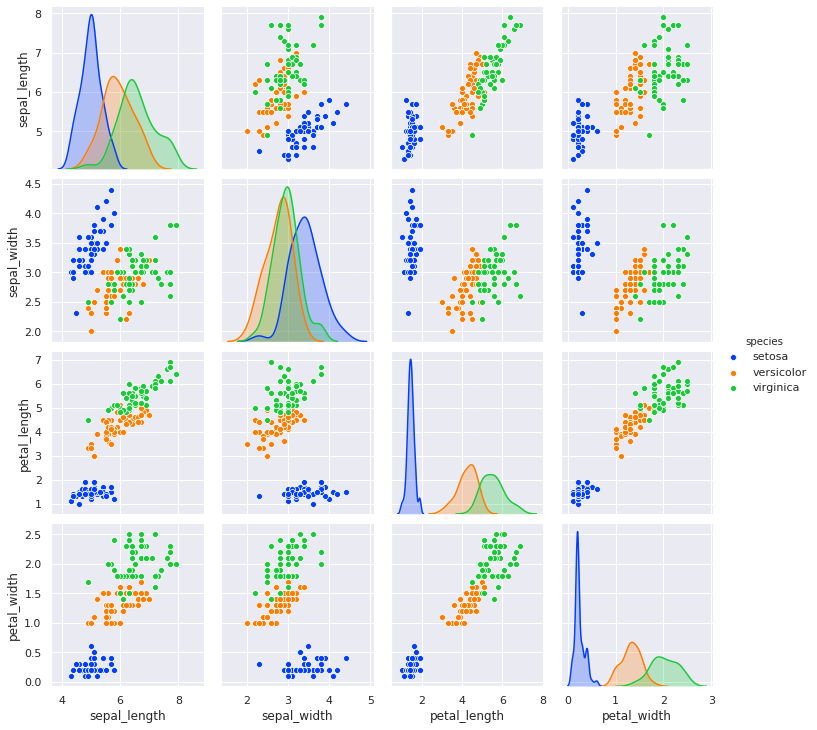

In [150]:
import seaborn as sns
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright")

While there are many good options, petal length vs petal width for setosa and versicolor looks like a good option. We will move forward with that

In [151]:
df=iris[(iris['species']!='virginica')] 
df=df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


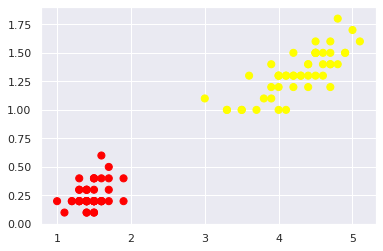

In [152]:
#let's convert categorical values to numerical target
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]        #just take the features
y=df['species']         #class
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
# Refer https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html for understanding how the above line works

In [153]:
#training the model
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10) #C is the regulatrization parameter. 
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [154]:
#print the support vectors
model.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

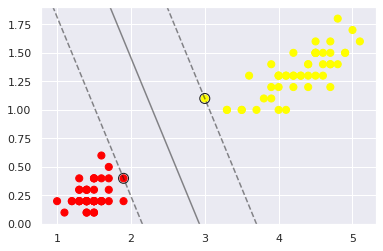

In [155]:
# Don't need to understand the code here. We just want to visulaize the margins. 
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

We know that SVM margins do change if we remove the support vectors. Let's test that out. 

In [156]:
# let's remove support vectors
indices_to_remove = []
for vector in model.support_vectors_:
    for index,row in df.iterrows():
        if((row['petal_length'] == vector[0]) and (row['petal_width'] == vector[1])):
            indices_to_remove.append(index)
for i in indices_to_remove:
    df = df.drop(df.index[i])

In [157]:
X=df.iloc[:,0:2]        #just take the features
y=df['species']         #class

model = SVC(kernel='linear', C=1E10) #C is the regulatrization parameter. 
model.fit(X, y)


SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

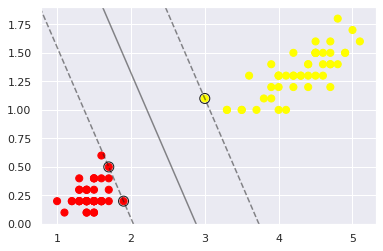

In [158]:
# Don't need to understand the code here. We just want to visulaize the margins. 
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

Okay, now another fact is that svm margins won't change if you delete any point but the support vectors. Use the above code as template and give it a try!

# 3. Neural Networks

No code can beat the insights provided by https://playground.tensorflow.org/. I strongly encourage everyone to give this a try, play around with the parameters and observe the loss change. Toggle between activation functions, learning rates, etc.



# 4. DBSCAN
(Source : https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)


Density-based spatial clustering of applications with noise (DBSCAN) is a clustering algorithm extremely useful in unsupervised classification. Let's give it a try


In [159]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

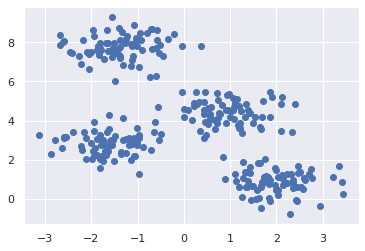

In [160]:
# Making our own data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Here is where DBSCAN's parameters come in . There are three important parameters for DBSCAN:

eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

eps can be calculated using many heuristics. For one of them you can refer https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80. What this does is for each point, it finds distance to the nearest point and stores it in an array. On sorting the distance and plotting the same, the point where there is a significant increase is taken as eps. 

We use the same technique and take the value 0.3. We keep minimum samples parameter to 5 (What will happen if i increase or decrease it?). 

In [161]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)


DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

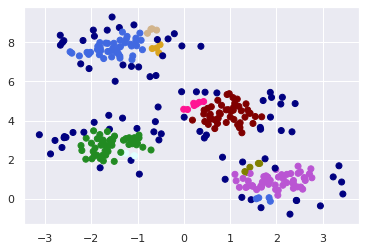

In [162]:
# You don't need to understand this code. It is just plotting our model's result
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

All the dark blue points are noise. 